In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
#from sklearn.preprocessing import StandardScaler
%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf


In [2]:
seq_model = keras.models.load_model('D:\python\\partial data\\first')
func_model = keras.models.load_model('D:\python\\partial data\\second')
rnd_model = keras.models.load_model('D:\python\\partial data\\third')
poly_model = keras.models.load_model('D:\python\\partial data\\fourth')

In [3]:
totaldf.insert(5,'sequential', (np.exp(np.power(seq_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(6,'functional',(np.exp(np.power(func_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(7,'3layerdeep',(np.exp(np.power(rnd_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'poly',(np.exp(np.power(poly_model.predict(X_features[2]),2)) -0.0012))
totaldf.sequential = totaldf.sequential*totaldf.μob
totaldf.functional = totaldf.functional*totaldf.μob
totaldf['3layerdeep'] = totaldf['3layerdeep']*totaldf.μob
totaldf.poly = totaldf.poly*totaldf.μob

72/72 [==============================] - 0s 2ms/step


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,sequential,functional,3layerdeep,poly
0,2200.290403,2200.290403,0.000000,0.998694,0.998694,0.998435,0.998765,0.998713,0.998699
1,2200.290403,2348.433431,148.143028,0.998694,1.007933,1.008968,1.010086,1.009684,1.008329
2,2200.290403,2496.576459,296.286056,0.998694,1.017506,1.020441,1.017143,1.018474,1.016427
3,2200.290403,2644.719487,444.429084,0.998694,1.027358,1.030747,1.024869,1.027799,1.024526
4,2200.290403,2792.862515,592.572112,0.998694,1.037444,1.041297,1.033625,1.035797,1.036461
...,...,...,...,...,...,...,...,...,...
15,3910.215923,5560.049012,1649.833090,0.125504,0.155127,0.147039,0.149691,0.158257,0.153111
16,3910.215923,5670.037885,1759.821962,0.125504,0.157137,0.148420,0.150986,0.160312,0.154231
17,3910.215923,5780.026758,1869.810835,0.125504,0.159150,0.149802,0.152174,0.162370,0.155114
18,3910.215923,5890.015630,1979.799708,0.125504,0.161165,0.151187,0.153359,0.164436,0.155964


In [16]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(4):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index =  ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,-1.062161,4.898415,2.893299,4.092857
2 hidden layers,-0.660996,4.699448,2.820842,3.816356
3 hidden layers,-0.572776,4.829153,2.854177,3.937317
4 hidden layers,-1.105574,4.888584,2.974521,4.033953


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
sequential,-0.504868,3.267943,2.074556,3.942634
functional,-0.599416,3.400277,2.159783,4.122492
3layerdeep,-0.312232,3.388904,2.138888,3.880563
poly,-0.860724,3.381426,2.237353,4.258878


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
sequential,-2.887446,6.626246,4.599088,96.600027
functional,-1.417570,6.321835,3.999821,87.434637
3layerdeep,-1.883050,6.277252,4.102567,89.571823
poly,-2.221033,6.152967,4.036343,88.847544


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
sequential,-1.946900,5.475792,3.224669,161.756115
functional,-0.852549,5.236724,3.242967,157.182288
3layerdeep,-1.208191,5.325683,3.314563,149.713064
poly,-0.830107,5.262994,3.388083,148.704768


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
sequential,3.004194,7.095680,4.512895,1281.936536
functional,3.009794,6.740489,4.828306,1152.006294
3layerdeep,4.327974,7.564463,5.165048,1439.562142
poly,0.779909,10.250493,6.715915,1652.059352


In [10]:
def UndersatErrorPlot(a):
    models = ['sequential','functional','3layerdeep','poly']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+5]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.figure(figsize=(12,8))
    


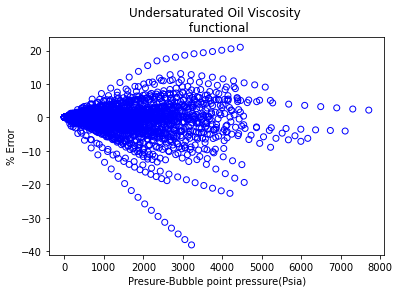

<Figure size 864x576 with 0 Axes>

In [11]:
UndersatErrorPlot('functional')

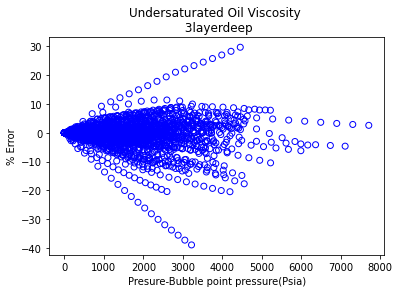

<Figure size 864x576 with 0 Axes>

In [12]:
UndersatErrorPlot('3layerdeep')

In [13]:
def UndersatViscPlot(a):
    models = ['sequential','functional','3layerdeep']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+5],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')
   

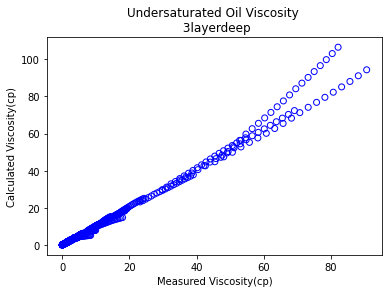

In [14]:
UndersatViscPlot('3layerdeep')

Text(0, 0.5, '% Average Absolute Error')

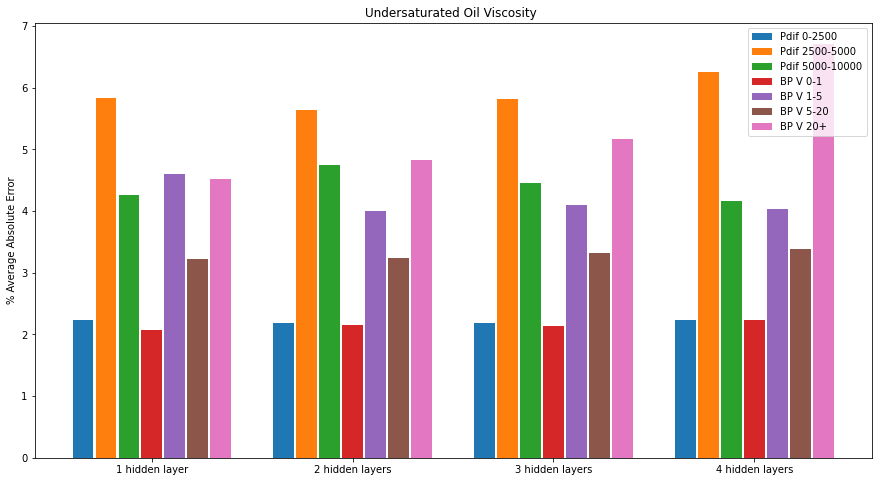

In [17]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}   
models =   ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers']

%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(4), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")